In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(28):
    s = ''
    for j in range(28):
        s = s + str("{0:3d}".format(x_train[0, i, j]))
    print(s)
    
print(y_train[0])

Using TensorFlow backend.


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

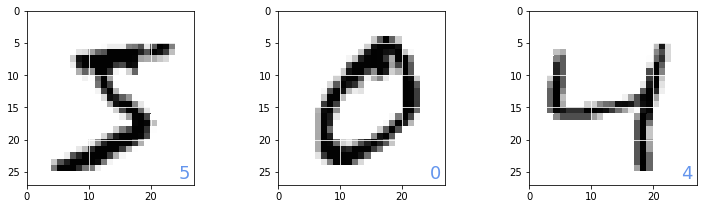

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace = 0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" % y_train[id], color = 'cornflowerblue', fontsize = 18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color = 'white')
plt.show()
    

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(y_train[0:3, :])

(60000, 784)
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs = 10, batch_size = 1000, verbose = 1, 
                    validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test Accuracy', score[1])
print('Computation time:{0:.3f} sec'.format(time.time()-startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 2.0612 - accuracy: 0.2891 - val_loss: 1.7842 - val_accuracy: 0.5017
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.6034 - accuracy: 0.6529 - val_loss: 1.4350 - val_accuracy: 0.7673
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 1.3172 - accuracy: 0.7887 - val_loss: 1.1962 - val_accuracy: 0.8205
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 1.1112 - accuracy: 0.8250 - val_loss: 1.0172 - val_accuracy: 0.8447
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.9528 - accuracy: 0.8439 - val_loss: 0.8779 - val_accuracy: 0.85890.9551 - accuracy: 0.84
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.8294 - accuracy: 0.8590 - val_loss: 0.7705 - val_accuracy: 0.8712
Epoch 7/10
60000/60000 [=====================

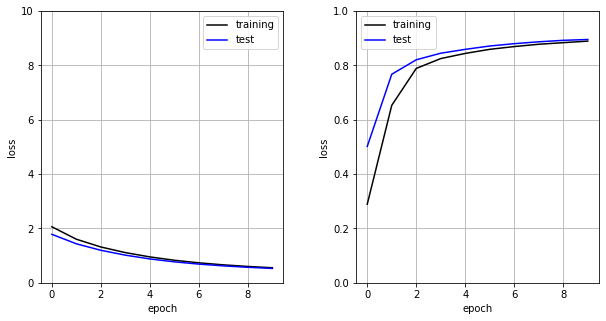

In [9]:
plt.figure(1, figsize = (10, 5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color = 'black')
plt.plot(history.history['val_loss'], label='test', color = 'blue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label='test', color = 'blue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

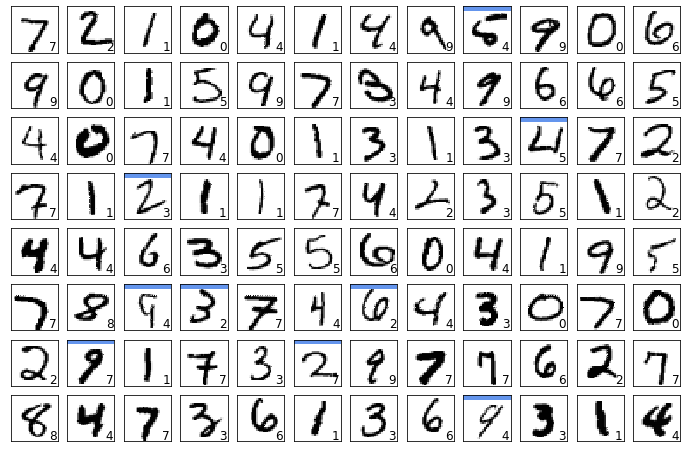

In [11]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color = 'cornflowerblue', linewidth = 5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()

In [12]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

import time
startTime = time.time()
history = model.fit(x_train, y_train, batch_size = 1000, epochs = 10, verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test Accuracy', score[1])
print('Computation time:{0:.3f} sec'.format(time.time()-startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 1.5055 - accuracy: 0.5587 - val_loss: 0.8023 - val_accuracy: 0.8289
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.6124 - accuracy: 0.8562 - val_loss: 0.4673 - val_accuracy: 0.8848
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.4305 - accuracy: 0.8878 - val_loss: 0.3757 - val_accuracy: 0.9029
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3643 - accuracy: 0.9007 - val_loss: 0.3329 - val_accuracy: 0.9104
Epoch 5/10
60000/60000 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.90 - 2s 27us/step - loss: 0.3292 - accuracy: 0.9083 - val_loss: 0.3069 - val_accuracy: 0.9155
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3061 - accuracy: 0.9142 - val_loss: 0.2903 - val_accuracy: 0.9188
Epoch 7/10
60000/60000 [==

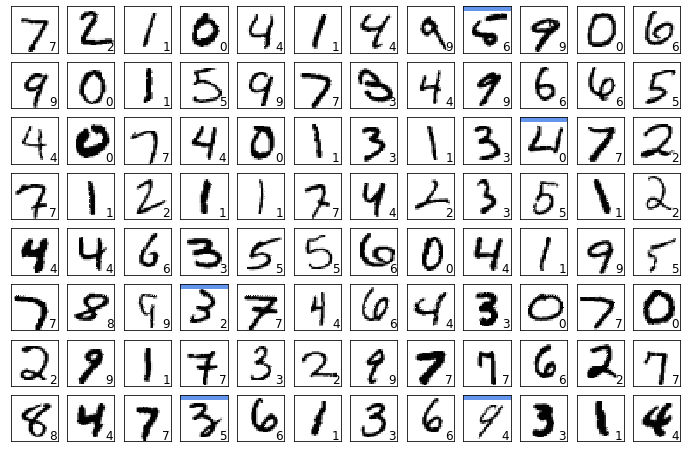

In [13]:
show_prediction()
plt.show()

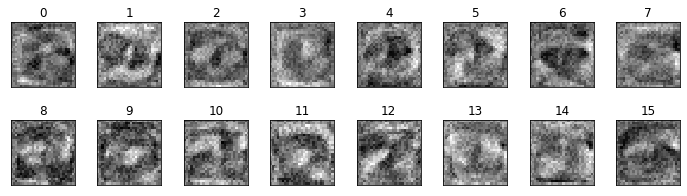

In [14]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()